### Bar Charts: Family Owned vs. Non Family Owned Business Stats
- Employment Size Categories
- Revenue Size Categories
- Years in Business Categories

In [1]:
import requests
import pandas as pd
import seaborn as sns

# gets raw API info, spits out dataframe
def cleanCensusAPIData(url):
    response = requests.get(url)
    raw = response.text
    rawlist = raw.split(',\n')
    newlist = []
    for i in rawlist:
        a = i.strip('[]""')
        b = a.split('","')
        newlist.append(b)
    df = pd.DataFrame(newlist[1:], columns=newlist[0])
    return df

# gets API link and calls previous function to spit out dataframe
def getAPI(dataset, params, geolocation='state', ic='00'):
    apilink = (f"https://api.census.gov/data/2018/{dataset}?get={params}&for={geolocation}:*&NAICS2017={ic}")
    df = cleanCensusAPIData(apilink)
    return df

In [8]:
# finds characteristics of business data, 
variables = "NAME,GEO_ID,PAYANN,EMP,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,FIRMPDEMP,YIBSZFI,RCPSZFI,EMPSZFI"
abscb = getAPI("abscb",variables,geolocation='us')

# filters for family owned and non family owned stats
familyowned = abscb[((abscb['BUSCHAR_LABEL']=='Family-owned') | (abscb['BUSCHAR_LABEL']=='Not family-owned'))]

# converting data type and changing column name for plotting
familyowned['FIRMPDEMP'] = familyowned['FIRMPDEMP'].astype(int)
familyowned = familyowned.rename(columns={'BUSCHAR_LABEL':'Ownership'})
familyowned.head()

C:\Users\cadba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,NAME,GEO_ID,PAYANN,EMP,QDESC,QDESC_LABEL,BUSCHAR,Ownership,FIRMPDEMP,YIBSZFI,RCPSZFI,EMPSZFI,NAICS2017,us
204,United States,0100000US,16604437,545655,B02,FAMOWN,BM,Family-owned,84089,318,001,001,00,1
205,United States,0100000US,46678795,1473911,B02,FAMOWN,BN,Not family-owned,242514,318,001,001,00,1
210,United States,0100000US,15366568,483986,B02,FAMOWN,BM,Family-owned,66709,319,001,001,00,1
211,United States,0100000US,45221266,1147235,B02,FAMOWN,BN,Not family-owned,186678,319,001,001,00,1
216,United States,0100000US,38819092,1159157,B02,FAMOWN,BM,Family-owned,129108,321,001,001,00,1


In [4]:
# (before i realized there was a EMPSZFI_LABEL column)
# generates labels for each code in EMPSZFI, merges into main dataframe 
empszfi_desc = ['All firms',
           'no employees',
           '1 to 4 employees',
           '5 to 9 employees',
           '10 to 19 employees',
           '20 to 49 employees',
           '50 to 99 employees',
           '100 to 249 employees',
           '250 to 499 employees',
           '500 employees or more']
empszfi_code = ['001','611','612','620','630','641','642','651','652','657']
empszfi_dict = {'EMPSZFI':empszfi_code,'EMPSZFILabel':empszfi_desc}
empszfi = pd.DataFrame(empszfi_dict)
familyowned = familyowned.merge(empszfi,how='inner',on='EMPSZFI')
empszfi

,EMPSZFI,EMPSZFILabel
0,001,All firms
1,611,no employees
2,612,1 to 4 employees
3,620,5 to 9 employees
4,630,10 to 19 employees
5,641,20 to 49 employees
6,642,50 to 99 employees
7,651,100 to 249 employees
8,652,250 to 499 employees
9,657,500 employees or more


In [4]:
# (before i realized there was a RCPSZFI_LABEL column)
# generates labels for each code in RCPSZFI, merges into main dataframe 
rcpszfi_desc = ['All firms',
                'less than \$5,000',
                '\$5,000 to \$9,999',
                '\$10,000 to \$24,999',
                '\$25,000 to \$49,999',
                '\$50,000 to \$99,999',
                '\$100,000 to \$249,999',
                '\$250,000 to \$499,999',
                '\$500,000 to \$999,999',
                '\$1,000,000 or more']
rcpszfi_code = ['001','511','518','519','521','522','523','525','531','532']
rcpszfi_dict = {'RCPSZFI':rcpszfi_code,'RCPSZFILabel':rcpszfi_desc}
rcpszfi = pd.DataFrame(rcpszfi_dict)
familyowned = familyowned.merge(rcpszfi,how='inner',on='RCPSZFI')
rcpszfi

,RCPSZFI,RCPSZFILabel
0,001,All firms
1,511,"less than \$5,000"
2,518,"\$5,000 to \$9,999"
3,519,"\$10,000 to \$24,999"
4,521,"\$25,000 to \$49,999"
5,522,"\$50,000 to \$99,999"
6,523,"\$100,000 to \$249,999"
7,525,"\$250,000 to \$499,999"
8,531,"\$500,000 to \$999,999"
9,532,"\$1,000,000 or more"


In [5]:
# (before i realized there was a YIBSZFI_LABEL column)
# generates labels for each code in YIBSZFI, merges into main dataframe 
yibszfi_desc = ['All firms',
           'less than 2 years',
           '2 to 3 years',
           '4 to 5 years',
           '6 to 10 years',
           '11 to 15 years',
           '16 or more years']
yibszfi_code = ['001','311','318','319','321','322','323']
yibszfi_dict = {'YIBSZFI':yibszfi_code,'YIBSZFILabel':yibszfi_desc}
yibszfi = pd.DataFrame(yibszfi_dict)
familyowned = familyowned.merge(yibszfi,how='inner',on='YIBSZFI')

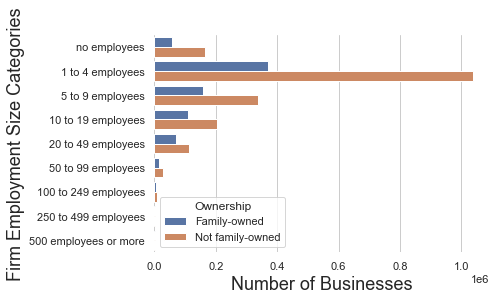

In [6]:
# filters for all years in business, all revenue sizes, and not all employee sizes
familyowned_emp = familyowned[((familyowned['YIBSZFI']=='001') & (familyowned['RCPSZFI']=='001') & (familyowned['EMPSZFI']!='001'))]

# graph compares firm employment sizes with family owned and non family owned
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='FIRMPDEMP', 
                 y='EMPSZFILabel', 
                 hue='Ownership',
                 data=familyowned_emp, 
                 # orient='h'
                )
ax.set_xlabel('Number of Businesses', size=18)
ax.set_ylabel('Firm Employment Size Categories', size=18)
sns.despine(left=True, bottom=True)

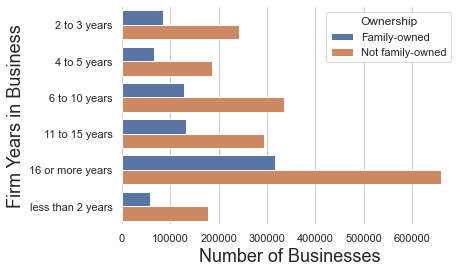

In [6]:
# filters for not all years in business, all revenue sizes, and all employee sizes
familyowned_yib = familyowned[((familyowned['YIBSZFI']!='001') & (familyowned['EMPSZFI']=='001') & (familyowned['RCPSZFI']=='001'))]

# graph compares years in business with family owned and non family owned
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='FIRMPDEMP', 
                 y='YIBSZFILabel', 
                 hue='Ownership',
                 data=familyowned_yib, 
                 # orient='h'
                )
ax.set_xlabel('Number of Businesses', size=18)
ax.set_ylabel('Firm Years in Business', size=18)
sns.despine(left=True, bottom=True)

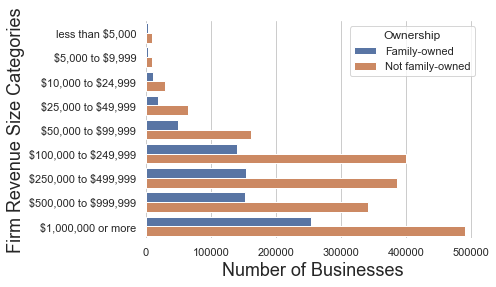

In [10]:
# filters for all years in business, not all revenue sizes, and all employee sizes
familyowned_rcp = familyowned[((familyowned['RCPSZFI']!='001') & (familyowned['EMPSZFI']=='001') & (familyowned['YIBSZFI']=='001'))]

# graph compares firm revenue sizes with family owned and non family owned
ax = sns.barplot(x='FIRMPDEMP', 
                 y='RCPSZFILabel', 
                 hue='Ownership',
                 data=familyowned_rcp, 
                 # orient='h'
                )
ax.set_xlabel('Number of Businesses', size=18)
ax.set_ylabel('Firm Revenue Size Categories', size=18)
sns.despine(left=True, bottom=True)

In [9]:
# Import and compare race for Family Owned vs not Family Owned for the US
us_bus_chars_race = pd.read_json('http://api.census.gov/data/2018/abscb?get=NAME,GEO_ID,BUSCHAR_LABEL,QDESC,QDESC_LABEL,EMP,RACE_GROUP,RACE_GROUP_LABEL,PAYANN,FIRMPDEMP&for=us:*&RACE_GROUP=30&RACE_GROUP=40&RACE_GROUP=50&RACE_GROUP=60&RACE_GROUP=70&RACE_GROUP=91&BUSCHAR=BM&BUSCHAR=BN&key=3c47dc6fcb2b5789a1efb564653020ff1dbdb6c4')
us_bus_chars_race.columns = us_bus_chars_race.iloc[0]
us_bus_chars_race = us_bus_chars_race.iloc[1:].reset_index(drop=True)

In [12]:
#collect only the variables we need
family_owner_race = us_bus_chars_race[['BUSCHAR','FIRMPDEMP','RACE_GROUP_LABEL']]
#Change the FIRMPDEMP to an integer
family_owner_race['FIRMPDEMP'] = family_owner_race['FIRMPDEMP'].astype(int)
#Rename each column
family_owner_race.columns = ['Ownership', 'Number of Firms', 'Race']
#Rename the values to be more easily understandable
family_owner_race.loc[family_owner_race['Ownership'] == 'BM', 'Ownership'] = 'Family-Owned'
family_owner_race.loc[family_owner_race['Ownership'] == 'BN', 'Ownership'] = 'Not Family-Owned'
family_owner_race.shape

C:\Users\cadba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(12, 3)

Text(0.5, 0, 'Number of Firms (in millions)')

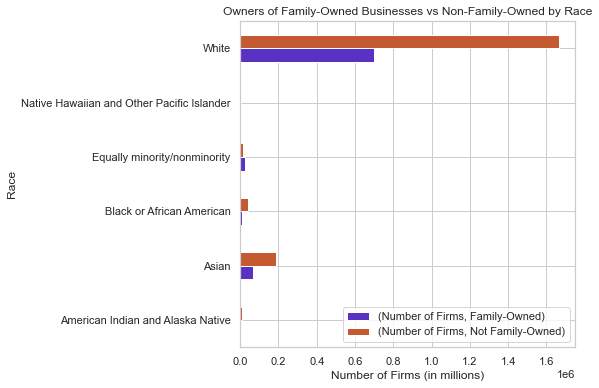

In [27]:
# Create a pivot table and bar chart for family owned business by race
pivot = pd.pivot_table(data = family_owner_race, index=['Race'], values=['Number of Firms'], columns=['Ownership'])
pivot.head(6)
ax = pivot.plot.barh(title = 'Owners of Family-Owned Businesses vs Non-Family-Owned by Race', figsize =(6,6), color = ['#5932C4','#C45932'])
ax.set_ylabel('Race')
ax.legend(loc = 'lower right')
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_xlabel('Number of Firms (in millions)')

In [18]:
# Import and compare sex for Family Owned vs not Family Owned for the US
us_bus_chars_sex = pd.read_json('http://api.census.gov/data/2018/abscb?get=NAME,GEO_ID,BUSCHAR_LABEL,QDESC,QDESC_LABEL,EMP,SEX_LABEL,PAYANN,FIRMPDEMP&for=us:*&SEX=002&SEX=003&SEX=004&BUSCHAR=BM&BUSCHAR=BN&key=3c47dc6fcb2b5789a1efb564653020ff1dbdb6c4')
us_bus_chars_sex.columns = us_bus_chars_sex.iloc[0]
us_bus_chars_sex = us_bus_chars_sex.iloc[1:].reset_index(drop=True)

In [19]:
#collect only the variables we need
family_owner_sex = us_bus_chars_sex[['BUSCHAR','FIRMPDEMP','SEX_LABEL']]
#Change the FIRMPDEMP to an integer
family_owner_sex['FIRMPDEMP'] = family_owner_sex['FIRMPDEMP'].astype(int)
#Rename each column
family_owner_sex.columns = ['Ownership', 'Number of Firms', 'Sex']
#Rename the values to be more easily understandable
family_owner_sex.loc[family_owner_sex['Ownership'] == 'BM', 'Ownership'] = 'Family-Owned'
family_owner_sex.loc[family_owner_sex['Ownership'] == 'BN', 'Ownership'] = 'Not Family-Owned'

C:\Users\cadba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'Number of Firms (in millions)')

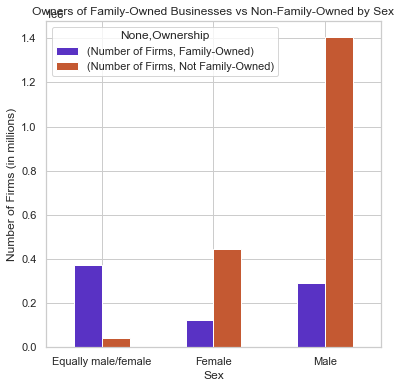

In [30]:
# Create a pivot table and bar chart for family owned business by race
pivot = pd.pivot_table(data = family_owner_sex, index=['Sex'], values=['Number of Firms'], columns=['Ownership'])
ax = pivot.plot.bar(title = 'Owners of Family-Owned Businesses vs Non-Family-Owned by Sex', figsize =(6,6), color = ['#5932C4','#C45932'])
ax.set_xlabel('Sex')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)
ax.set_ylabel('Number of Firms (in millions)')